<a href="https://colab.research.google.com/github/grupo21dex/deliverable-1/blob/main/tratando_dados_deliverable1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Primeiro Deliverable
#Projeto Roof Imóveis


#Determinar as 5 melhores e as 5 piores opções de compra explicando o porque

#Analisar os imóveis que forma vendidos mais de uma vez e usar como régua para avaliarmos os melhores imóveis

In [1]:
#bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import geopy


#Adicionando uma coluna com o endereço das residencias

In [ ]:
#DataFrame
#dados = pd.read_csv('kc_house_data.csv')
#dados


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
# localizar o endereço dado latitude e longitude:geolocator.reverse(Latitude+","+Longitude)
#controle
#from geopy.geocoders import Nominatim
#geolocator = Nominatim(user_agent="geoapiExercises")
#address = geolocator.reverse(str(dados['lat'][0])+','+str(dados['long'][0]))
#print(address)

10012, 61st Avenue South, Rainier Beach, Seattle, King County, Washington, 98178, United States


In [ ]:
#determina o endereço dado a latitude e longitude e cria a coluna address com os endereços (DEMOROU 3 HORAS!!!!)
#from geopy.geocoders import Nominatim
#geolocator = Nominatim(user_agent="geoapiExercises")
#address = list()
#for x in dados.index:
  #address.append(geolocator.reverse(str(dados['lat'][x])+','+str(dados['long'][x])))
#dados['address'] = address

In [ ]:
#salvei um novo dataframe para não ter que carregar o endereço de novo
#dados.to_excel("df_cende.xlsx")

In [2]:
#dataframe com o endereço
df = pd.read_excel('df_cende.xlsx')
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,address
0,0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,"10012, 61st Avenue South, Rainier Beach, Seatt..."
1,1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,"837, Northeast 127th Street, Northgate, Seattl..."
2,2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,"15109, 81st Avenue Northeast, Moorlands, Kenmo..."
3,3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,"9236, Fauntleroy Way Southwest, Fauntleroy, Se..."
4,4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,"923, 221st Avenue Northeast, Sammamish, King C..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,"927, North 97th Street, Licton Springs, Greenw..."
21609,21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,"2211, Southwest 103rd Place, White Center, Sea..."
21610,21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,"902, 26th Avenue South, Leschi, Seattle, King ..."
21611,21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,"2136, Northwest Boulder Way Drive, Talus, Issa..."


#Calculando preço por area dos imoveis:

In [3]:
df['price/area'] = df['price'] / df['sqft_living']#área habitavel
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,address,price/area
0,0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,"10012, 61st Avenue South, Rainier Beach, Seatt...",188.050847
1,1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,"837, Northeast 127th Street, Northgate, Seattl...",209.338521
2,2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,"15109, 81st Avenue Northeast, Moorlands, Kenmo...",233.766234
3,3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,"9236, Fauntleroy Way Southwest, Fauntleroy, Se...",308.163265
4,4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,"923, 221st Avenue Northeast, Sammamish, King C...",303.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,"927, North 97th Street, Licton Springs, Greenw...",235.294118
21609,21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,"2211, Southwest 103rd Place, White Center, Sea...",173.160173
21610,21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,"902, 26th Avenue South, Leschi, Seattle, King ...",394.216667
21611,21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,"2136, Northwest Boulder Way Drive, Talus, Issa...",250.000000


In [5]:
#dataframe com preço/areaterrno
df['price/areatotal'] = df['price'] / df['sqft_lot']#área terreno
df.head(3)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,address,price/area,price/areatotal
0,0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,"10012, 61st Avenue South, Rainier Beach, Seatt...",188.050847,39.274336
1,1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,"837, Northeast 127th Street, Northgate, Seattl...",209.338521,74.288870
2,2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,"15109, 81st Avenue Northeast, Moorlands, Kenmo...",233.766234,18.000000


#Coluna resell é o numéro de vezes que a casa foi vendida

In [ ]:
#mostra quantas vezes cada imóvel foi vendido
unico = list()
repetido = list()
for x in df['id']:
  unico.append(x)
  repetido.append(unico.count(x))
repetido

In [7]:
#cria a coluna resell(ESTÁ COM UM ERRO A PRIMEIRA VEZ QUE O IMÓVEL APARECE NO DATAFRAMA O RESELL ESTÁ COMO 1, COLOCAR PARA O NUMERO MAXIMO DE VEZES QUE A RESIDENCIA APARECE)
#dataframe com número de vezes que cada imóvel foi vendido
df['resell'] = repetido
df


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,address,price/area,price/areatotal,resell
0,0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,...,0,98178,47.5112,-122.257,1340,5650,"10012, 61st Avenue South, Rainier Beach, Seatt...",188.050847,39.274336,1
1,1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,...,1991,98125,47.7210,-122.319,1690,7639,"837, Northeast 127th Street, Northgate, Seattl...",209.338521,74.288870,1
2,2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,...,0,98028,47.7379,-122.233,2720,8062,"15109, 81st Avenue Northeast, Moorlands, Kenmo...",233.766234,18.000000,1
3,3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,...,0,98136,47.5208,-122.393,1360,5000,"9236, Fauntleroy Way Southwest, Fauntleroy, Se...",308.163265,120.800000,1
4,4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,...,0,98074,47.6168,-122.045,1800,7503,"923, 221st Avenue Northeast, Sammamish, King C...",303.571429,63.118812,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,...,0,98103,47.6993,-122.346,1530,1509,"927, North 97th Street, Licton Springs, Greenw...",235.294118,318.302387,1
21609,21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,...,0,98146,47.5107,-122.362,1830,7200,"2211, Southwest 103rd Place, White Center, Sea...",173.160173,68.811285,1
21610,21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,...,0,98144,47.5944,-122.299,1020,2007,"902, 26th Avenue South, Leschi, Seattle, King ...",394.216667,297.852593,1
21611,21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,...,0,98027,47.5345,-122.069,1410,1287,"2136, Northwest Boulder Way Drive, Talus, Issa...",250.000000,167.504188,1


#Calculando o lucro e a perda quando um imóvel foi vendido mais de uma vez

#Separar do data frame apenas valores numerais para construção de graficos e correlações 

In [9]:
df.select_dtypes(include='number')

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price/area,price/areatotal,resell
0,0,7129300520,221900,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,188.050847,39.274336,1
1,1,6414100192,538000,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,209.338521,74.288870,1
2,2,5631500400,180000,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,233.766234,18.000000,1
3,3,2487200875,604000,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,308.163265,120.800000,1
4,4,1954400510,510000,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,303.571429,63.118812,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,360000,3,2.50,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,235.294118,318.302387,1
21609,21609,6600060120,400000,4,2.50,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,173.160173,68.811285,1
21610,21610,1523300141,402101,2,0.75,1020,1350,2.0,0,0,...,2009,0,98144,47.5944,-122.299,1020,2007,394.216667,297.852593,1
21611,21611,291310100,400000,3,2.50,1600,2388,2.0,0,0,...,2004,0,98027,47.5345,-122.069,1410,1287,250.000000,167.504188,1


#removendo valores qualitativos

In [19]:

numdf = df.drop(['id','date','bathrooms','floors','waterfront','view','yr_built','yr_renovated','zipcode', 'lat','long', 'address','resell','condition','grade','bedrooms'],axis = 1)
pd.DataFrame(numdf)

,Unnamed: 0,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price/area,price/areatotal
0,0,221900,1180,5650,1180,0,1340,5650,188.050847,39.274336
1,1,538000,2570,7242,2170,400,1690,7639,209.338521,74.288870
2,2,180000,770,10000,770,0,2720,8062,233.766234,18.000000
3,3,604000,1960,5000,1050,910,1360,5000,308.163265,120.800000
4,4,510000,1680,8080,1680,0,1800,7503,303.571429,63.118812
...,...,...,...,...,...,...,...,...,...,...
21608,21608,360000,1530,1131,1530,0,1530,1509,235.294118,318.302387
21609,21609,400000,2310,5813,2310,0,1830,7200,173.160173,68.811285
21610,21610,402101,1020,1350,1020,0,1020,2007,394.216667,297.852593
21611,21611,400000,1600,2388,1600,0,1410,1287,250.000000,167.504188


#Gráficos

Text(0, 0.5, 'Area do Terreno')

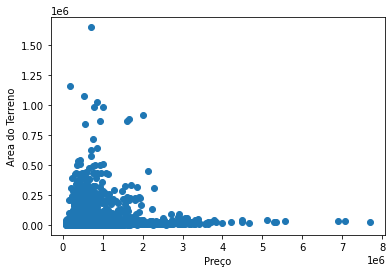

In [24]:
fig = plt.figure()
plt.scatter(numdf['price'],numdf['sqft_lot'])
plt.xlabel('Preço')
plt.ylabel('Area do Terreno')

{'boxes': [<matplotlib.lines.Line2D at 0x7fc135fb5ed0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc135d3e8d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc1359a9710>],
 'means': [<matplotlib.lines.Line2D at 0x7fc135a5a310>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc135b7b1d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc135e9a510>,
  <matplotlib.lines.Line2D at 0x7fc135dedc10>]}

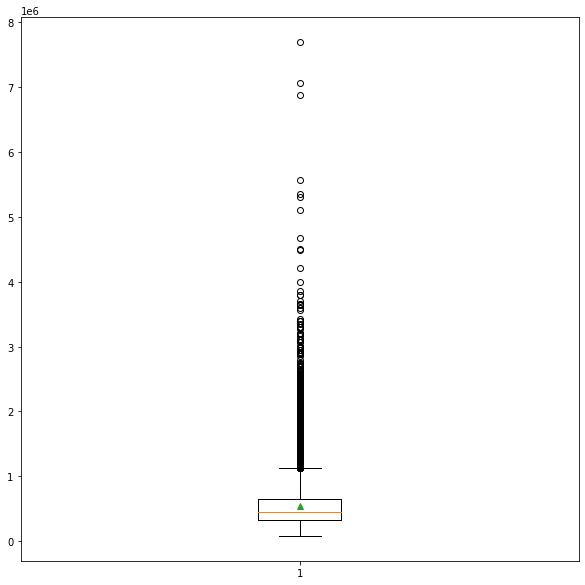

In [35]:
fig = plt.figure(figsize=(10,10))
plt.boxplot(numdf['price'],showmeans=True)

In [ ]:
#fazendo um gráfico scatter para verificar 

--------------------------------------------------------------------------------

In [ ]:
#correlacionar as colunas
#sns.pairplot(df)

In [ ]:
df.loc[df['id']==6021501535]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,address,price/area,resell
93,93,6021501535,20140725T000000,430000,3,1.5,1580,5000,1.0,0,...,1939,0,98117,47.687,-122.386,1570,4500,"8002, Jones Avenue Northwest, Loyal Heights, B...",272.151899,1
94,94,6021501535,20141223T000000,700000,3,1.5,1580,5000,1.0,0,...,1939,0,98117,47.687,-122.386,1570,4500,"8002, Jones Avenue Northwest, Loyal Heights, B...",443.037975,2


In [ ]:
#como conseguir um valor de uma linha/coluna determinando uma coluna


#def variacao(val1,val2):
  #val1 = df['price'][index(df[''])]

In [ ]:
for x in df:
  if df['resell']>1:
    df['price'][-1] - df['price'][-2]



ValueError: ignored

In [ ]:
#diminuir o valor do preço da venda mais recente pela venda anterior(msmo imóvel)
revenda = list()
for x in df['id']:
  revenda.append(df.loc[df['id'] == x])
revenda
from tqdm import tqdm

pbar = tqdm()


KeyboardInterrupt: ignored

In [ ]:
for x in repetido:
  casas_revendidas.append(df.loc[df['id'] == x])
#pd.DataFrame(casas_revendidas)
casas_revendidas

In [ ]:
df.describe()

In [ ]:
#id das casas que foram vendidas mais de 1 vez
unico = list()
repetido = list()
for x in df['id']:
  unico.append(x)
  if unico.count(x) != 1:
    repetido.append(x)
repetido#id das casas que foram vendidas mais de 1 vez

In [ ]:
#descrever so uma vez as id repetidas
juntar = list()
for x in repetido:
  if x not in juntar:
    juntar.append(x)
juntar

ValueError: ignored

In [ ]:
#df com as residencias repetidas:
df['id'] == repetido

ValueError: ignored

In [ ]:
df.corr()

In [ ]:
variave1 = list()
for x in df.index:
  print(x)

In [ ]:
#for x,y in zip(dados['lat'],dados['long']):
  #geolocator.reverse(str(dados['lat'][x])+','+str(dados['long'][y]))

KeyError: ignored

In [ ]:
#for x,y in zip(dados['lat'],dados['long']):
  #geolocator.reverse(str(x)+','+str(y))

KeyboardInterrupt: ignored

In [ ]:
#função para colocar o endereço
#def endereco(df):
  #address = geolocator.reverse(str(df['lat'])+','+str(df['long']))
  #return address

  

In [ ]:
#colocando o endereço no dataframe
#dados['address'] = dados.apply(endereco,axis=1)
#endereco(dados)

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/base.py:256: UserWarning: Unable to parse the string as Point: "Failed to create Point instance from string: unknown format.". Using the value as-is for the query. In geopy 2.0 this will become an exception.
  'exception.' % str(e), UserWarning


ValueError: ignored

In [ ]:
#geolocator = Nominatim(user_agent="geoapiExercises")
#from geopy.geocoders import Nominatim
#geolocator = Nominatim(user_agent="geoapiExercises")
#dados['address'] = geolocator.reverse(str(dados['lat'])+','+str(dados['long']))

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/base.py:256: UserWarning: Unable to parse the string as Point: "Failed to create Point instance from string: unknown format.". Using the value as-is for the query. In geopy 2.0 this will become an exception.
  'exception.' % str(e), UserWarning


ValueError: ignored

In [ ]:
#dados

In [ ]:
#!pip install geopandas
#!pip install plotly_express

In [ ]:

#import pandas as pd
#import geopandas as gpd
#import geopy
#from geopy.geocoders import Nominatim
#from geopy.extra.rate_limiter import RateLimiter
#import matplotlib.pyplot as plt
#import plotly_express as px
#import tqdm
#from tqdm.notebook import tqdm_notebook

In [ ]:
#locator = Nominatim(user_agent="myGeocoder")
#coordinates = (dados['lat'], dados['long'])
#coordinates
#cidades = locator.reverse(coordinates)
#cidades.raw

(0        47.5112
 1        47.7210
 2        47.7379
 3        47.5208
 4        47.6168
           ...   
 21608    47.6993
 21609    47.5107
 21610    47.5944
 21611    47.5345
 21612    47.5941
 Name: lat, Length: 21613, dtype: float64, 0       -122.257
 1       -122.319
 2       -122.233
 3       -122.393
 4       -122.045
           ...   
 21608   -122.346
 21609   -122.362
 21610   -122.299
 21611   -122.069
 21612   -122.299
 Name: long, Length: 21613, dtype: float64)

In [ ]:
#ende = list()
#for x,y in zip(dados['lat'],dados['long']):
  #ende.append(geolocator.reverse(str(x)+','+str(y))
#ende


SyntaxError: ignored